In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
import nltk
import regex as re
from nltk.corpus import stopwords
from sklearn.linear_model import LogisticRegression
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
%matplotlib inline

In [3]:
df = pd.read_csv('../data_csv/eda_df.csv')

In [4]:
df.head(3)

,title,subreddit
0,What do you guys enjoy about your job?,1
1,"Why the rich stay rich, maybe",1
2,Speechless and sad,1


In [5]:
X = df['title']
y = df['subreddit']

In [6]:
X

0                  What do you guys enjoy about your job?
1                           Why the rich stay rich, maybe
2                                      Speechless and sad
3                    Misogynistic Guy Demands A Pie Chart
4            Customer angry refunds are not instantaneous
                              ...                        
7995    How to explain without making the customer sou...
7996                      Oh What a Night! (October 2019)
7997                    I am a barista sir, not a psychic
7998                               A common dumb question
7999                   I Know You Just Told Me, But When?
Name: title, Length: 8000, dtype: object

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    stratify=y,
                                                    random_state=42)

In [8]:
cvec = CountVectorizer()

In [9]:
cvec.fit(X_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [10]:
X_train = cvec.transform(X_train)

In [11]:
X_train_df = pd.DataFrame(X_train.toarray(),
                          columns=cvec.get_feature_names())
X_train_df

,000,01,10,100,1000,1000kms,101,104,10k,11,...,золото,имеет,испытывается,напастями,огнем,он,тем,хочет,человек,чем
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
X_test = cvec.transform(X_test)
X_test_df = pd.DataFrame(X_test.toarray(),
                         columns=cvec.get_feature_names())

X_test_df.head()

,000,01,10,100,1000,1000kms,101,104,10k,11,...,золото,имеет,испытывается,напастями,огнем,он,тем,хочет,человек,чем
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    stratify=y,
                                                    random_state=42)

In [14]:
y_test.value_counts(normalize=True)

1    0.5
0    0.5
Name: subreddit, dtype: float64

In [15]:
pipe = Pipeline([
    ('cvec', CountVectorizer()),
    ('lr', LogisticRegression(solver= 'lbfgs'))
])

In [16]:
pipe_params = {
    'cvec__max_features': [2_000, 3_000, 4_000, 5_000],
    'cvec__stop_words':['english', None],
    'cvec__ngram_range': [(1,1), (1,2)]
}

In [17]:
gs = GridSearchCV(pipe, # what object are we optimizing?
                  pipe_params, # what parameters values are we searching?
                  cv=5) # 5-fold cross-validation.

In [18]:
gs.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('cvec',
                                        CountVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                        prep

In [19]:
gs.best_score_

0.6855

In [20]:
print(f'Score on logistic regression training set: {gs.score(X_train, y_train)}')
print(f'Score on logistic regression testing set: {gs.score(X_test, y_test)}')

Score on logistic regression training set: 0.89
Score on logistic regression testing set: 0.7155


In [21]:
gs_model = gs.best_estimator_

In [22]:
gs_model.score(X_train, y_train)

0.89

In [23]:
gs_model.score(X_test, y_test)

0.7155

In [24]:
### looking at best parameters 
gs.best_params_

{'cvec__max_features': 5000,
 'cvec__ngram_range': (1, 1),
 'cvec__stop_words': None}

In [25]:
## this code is from the week 4 lab 2 Prediciting Kidney Disease Author: Matt Brems 
def roc(probas, true, step=0.01):
    """
    probas should be a numpy array of predict_probas
    true is a pandas series of true labels
    step is the step size for checking thresholds
    """
    
    probas = probas[:,1]  # The output of predict_proba() is an array of the probabilities for every class, but we only want the probabilities for class 1
    true = true.values    # We need to convert the class labels from a Pandas Series to a numpy array. We do this using the .values attribute
    assert(len(probas) == len(true)) # We're making sure that our probabilities vector is the same length as our true class labesl vector
    
    TPRs = [] # Setting up empty list of True Positive Rate
    FPRs = [] # Setting up empty list of False Positive Rate
    
    for i in np.arange(0.0,1.0,step): # np.arange allows us to use step sizes that are decimals
        preds_class = probas > i # Numpy arrays have a feature called 'broadcasting.' Check the documentation: https://docs.scipy.org/doc/numpy-1.13.0/user/basics.broadcasting.html to see what this does.
        TP = 0 
        FP = 0
        TN = 0
        FN = 0
        for index in range(len(preds_class)): # We're comparing each prediction with each true value here

            if preds_class[index] == 1 and true[index] == 1:
                TP += 1
            elif preds_class[index] == 1 and true[index] == 0:
                FP += 1
            elif preds_class[index] == 0 and true[index] == 0:
                TN += 1 
            elif preds_class[index] == 0 and true[index] == 1:
                FN += 1
                
        TPR = TP/(TP + FN) # Calculating TPR and FPR and appending to our lists
        FPR = FP/(FP + TN)
        
        TPRs.append(TPR)
        FPRs.append(FPR)
         
    plt.rcParams['font.size'] = 14
    plt.plot(FPRs, TPRs, color="orange")
    plt.plot([0,1],[0,1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.title('Receiver Operating Characteristic')
    plt.xlabel("False Positive Rate (1 - Specificity)")
    plt.ylabel("True Positive Rate (Sensitivity)")
    plt.show();

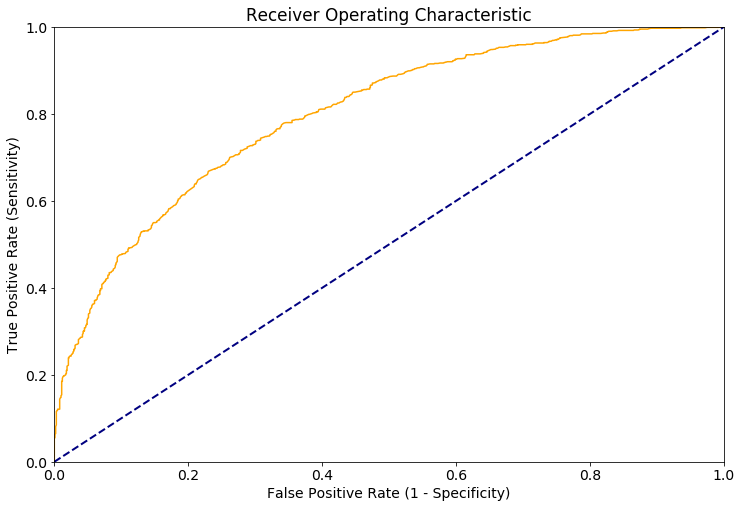

In [26]:
plt.figure(figsize = (12,8))
probabilities = gs.predict_proba(X_test)

roc(probas = probabilities, # pass in series of probabilities 
    true = y_test,          # pass in series of true values
    step=0.001); 

C:\Users\blang\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


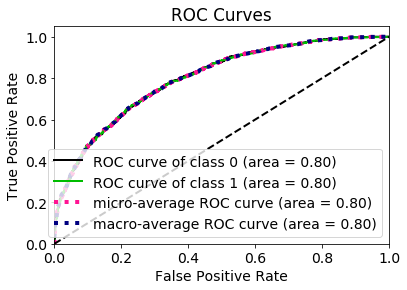

In [27]:
import scikitplot as skplt #to make things easy
y_pred_proba = gs.predict_proba(X_test)
skplt.metrics.plot_roc_curve(y_test, y_pred_proba)
plt.show()

In [28]:
probabilities

array([[0.66589341, 0.33410659],
       [0.58471673, 0.41528327],
       [0.68082328, 0.31917672],
       ...,
       [0.52758407, 0.47241593],
       [0.64794926, 0.35205074],
       [0.65754574, 0.34245426]])

In [29]:
preds = gs.predict(X_test)

In [30]:
preds[1:21]

array([0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0],
      dtype=int64)

In [31]:
from sklearn.metrics import confusion_matrix

In [32]:
tn, fp, fn, tp = confusion_matrix(y_test,
                                  preds).ravel()

print(confusion_matrix(y_test,
                       preds))

[[704 296]
 [273 727]]


In [33]:
# Calculate sensitivity.

sens = tp / (tp + fn)

print(f'Sensitivity: {round(sens, 4)}')

Sensitivity: 0.727


In [34]:
# Calculate specificity.

spec = tn / (tn + fp)

print(f'Specificity: {round(spec, 4)}')

Specificity: 0.704


In [35]:
prec = tp / (tp +fp)

print(f'Precision: {round(prec, 4)}')

Precision: 0.7107


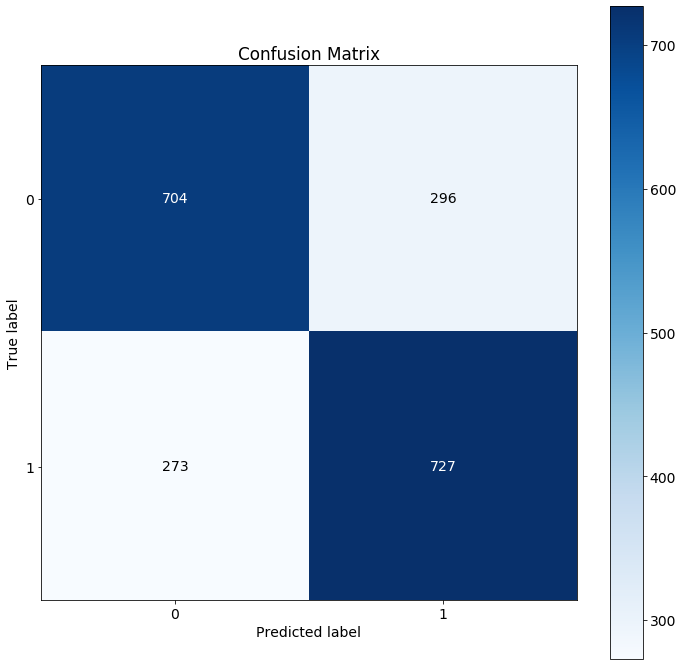

In [36]:
# code used from https://www.kaggle.com/agungor2/various-confusion-matrix-plots
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(
    y_test, 
    preds,
    figsize=(12,12))

In [38]:
cm = confusion_matrix(y_test, preds)

C:\Users\blang\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


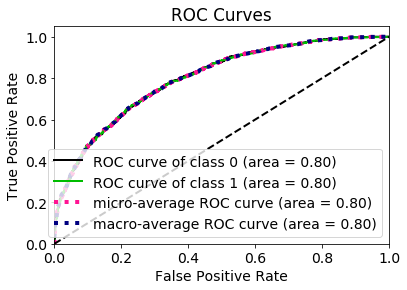

In [41]:
import scikitplot as skplt #to make things easy
y_pred_proba = gs.predict_proba(X_test)
skplt.metrics.plot_roc_curve(y_test, y_pred_proba)
plt.show()

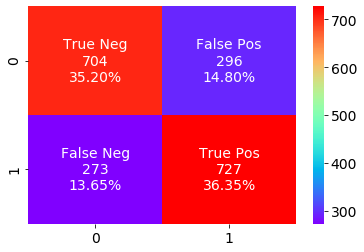

In [49]:
##### this code was found on https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='rainbow')